# Calcular la permeabilidad del reservorio utilizando data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Petroleum-DS-ML-with-Python/main/Pt.csv')
df

time  pressure
0    0.0010   2743.96
1    0.0021   2737.52
2    0.0034   2730.16
3    0.0048   2722.32
4    0.0064   2713.83
..      ...       ...
73  48.7900   2269.77
74  54.7900   2267.69
75  60.7900   2265.73
76  66.7900   2264.46
77  72.0000   2262.99

[78 rows x 2 columns]

## Hacemos un analisis cartesiano

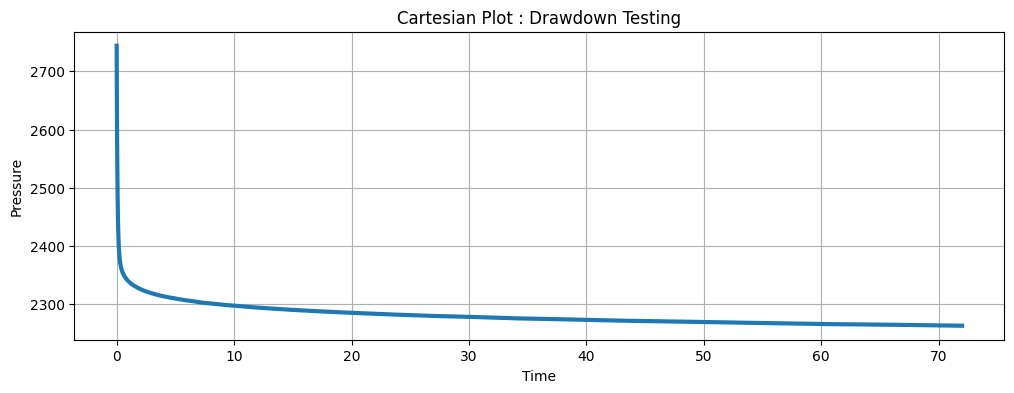

In [5]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(df['time'], df['pressure'],lw=3)

plt.xlabel('Time') ; plt.ylabel('Pressure')

plt.title('Cartesian Plot : Drawdown Testing')
plt.grid()

## Analisis semi - log

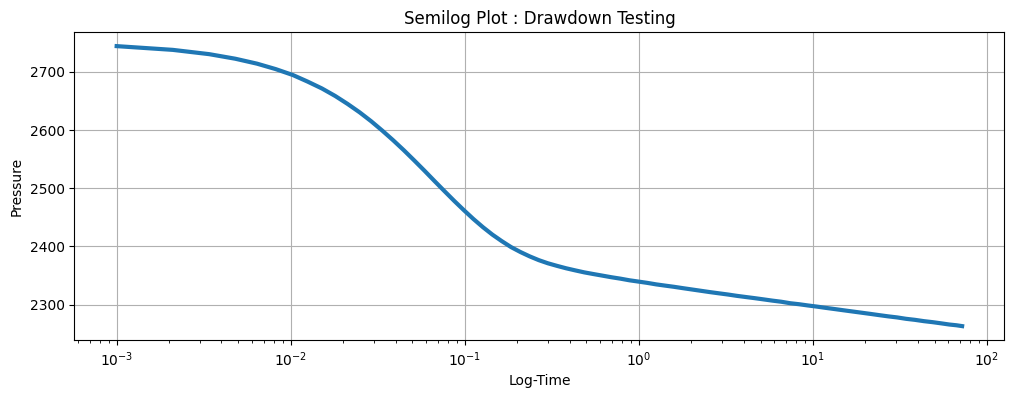

In [6]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],lw=3)

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')
plt.grid()

## Analisis grafico log - log

In [10]:
Pi = 2760 #psi esta la podes estimar del semilog

df['delP'] = np.abs(Pi - df['pressure'])

# np.diff(P) llamamos 'dP' en 'dP/dt'. 
#But it reduces one element.
df['d(delP)'] = np.zeros(len(df))
df['d(delP)'].iloc[1:] = np.abs(np.diff(df['delP']))


df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['time'])


#P' (Pdash) = t*dP/dt
df['Pdash'] = np.zeros(len(df))
df['Pdash'].iloc[1:] = df['time'].iloc[1:]*df['d(delP)'].iloc[1:]/df['dt'].iloc[1:]



df.head()

time  pressure   delP  d(delP)      dt      Pdash
0  0.0010   2743.96  16.04     0.00  0.0000   0.000000
1  0.0021   2737.52  22.48     6.44  0.0011  12.294545
2  0.0034   2730.16  29.84     7.36  0.0013  19.249231
3  0.0048   2722.32  37.68     7.84  0.0014  26.880000
4  0.0064   2713.83  46.17     8.49  0.0016  33.960000

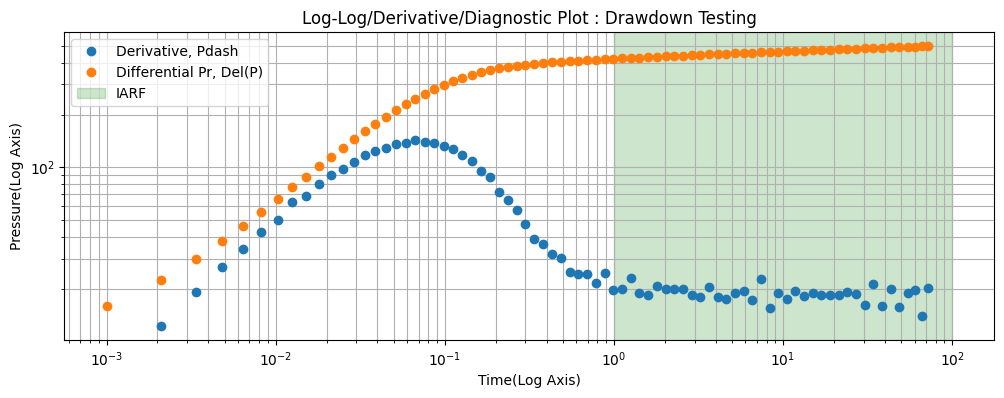

In [12]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['time'], df['Pdash'],'o',label='Derivative, Pdash')
plt.loglog(df['time'], df['delP'],'o',label='Differential Pr, Del(P)')

plt.axvspan(1,100,color='green',alpha=0.2,label='IARF') # Infinite Acting Radial Flow

plt.xlabel('Time(Log Axis)') ; plt.ylabel('Pressure(Log Axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot : Drawdown Testing')


plt.legend()
plt.grid(True, which="both")

In [13]:
df[df['time']>1]['pressure'].mean()

2298.7667567567564

In [14]:
tmin_iarf = 1 #hr
tmax_iarf = 50 #hrs

## Grafico semilog para IARF (Infinite Acting Radial Flow)  MTR (Middle Time Region)

In [16]:
df_semilog = df[(df['time']>=tmin_iarf) & (df['time'] <= tmax_iarf)]

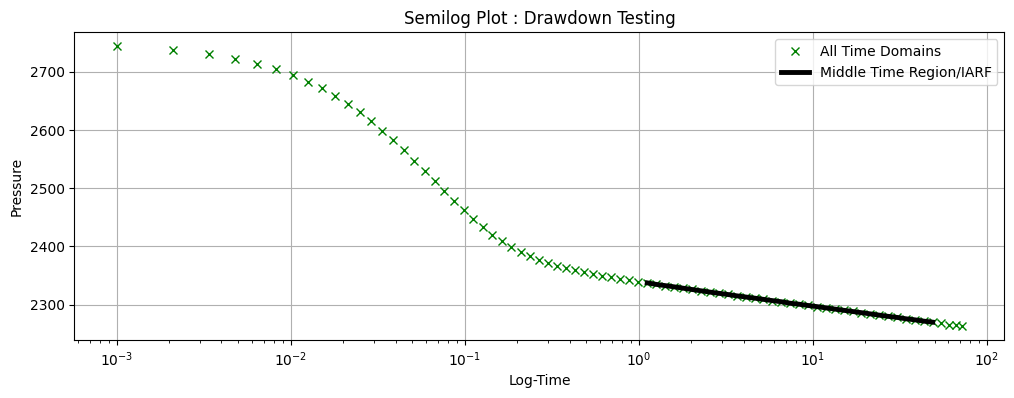

In [17]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],'x',color='green',label='All Time Domains')
plt.semilogx(df_semilog['time'], df_semilog['pressure'],color='black',lw=3.5,label='Middle Time Region/IARF')

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')

plt.legend()
plt.grid()

## Calculamos la permeabilidad

/home/juliom86/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


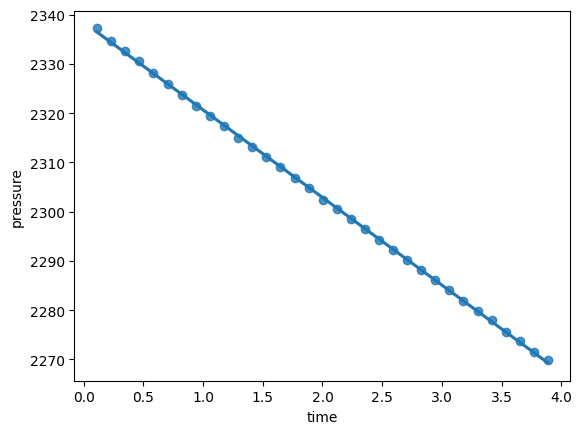

In [19]:
t = np.log(df_semilog['time'])
P = df_semilog['pressure']
sns.regplot(t,P);

In [20]:
#Polyfit
np.polyfit(t,P,1)

array([ -17.7869321 , 2338.42912687])

In [23]:
[slope,intercept]=np.polyfit(t,P,1)

In [24]:
abs(slope)

17.786932104989376

In [25]:
m = abs(slope)
m

17.786932104989376

In [26]:
q = 125 #stb/d
mu = 2.1 #cp
B = 1.14 #rb/Stb
h = 50 #ft

k = (162.6*q*mu)/(m*h)

print(f'Formation Permeability is : {np.round(k,2)} miliDarcies')

Formation Permeability is : 47.99 miliDarcies
